**PROYECTO IA, IMPLEMENTACIÓN DE KMEANS**
* Alanis Forero
* Kevin Carrillo
* Juan Buitrago

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

Dataset del proyecto en archivo "data_final.csv"

In [51]:
dset = pd.read_csv('data_final.csv')


In [52]:
dset.head()

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,...,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,Z_Score_Data_Value,Data_Value_Capped,LocationDesc_encoded
0,BRFSS~2015~2015~9001~Q27~TMC03~AGE~OVERALL,2015,2015,NRE,Northeast,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,...,TMC03,Q27,9001,AGE,65PLUS,OVERALL,OVERALL,-1.026349,14.3,37
1,BRFSS~2016~2016~9001~Q03~TMC01~AGE~GENDER,2016,2016,NRE,Northeast,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,TMC01,Q03,9001,AGE,65PLUS,GENDER,MALE,-1.419761,6.1,37
2,BRFSS~2020~2020~9004~Q03~TMC01~AGE~OVERALL,2020,2020,WEST,West,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,TMC01,Q03,9004,AGE,65PLUS,OVERALL,OVERALL,-1.304616,8.5,55
3,BRFSS~2015~2015~9004~Q43~TOC11~AGE~GENDER,2015,2015,WEST,West,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,...,TOC11,Q43,9004,AGE,5064,GENDER,MALE,-0.445828,26.4,55
4,BRFSS~2018~2018~9001~Q03~TMC01~AGE~RACE,2018,2018,NRE,Northeast,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,TMC01,Q03,9001,AGE,5064,RACE,HIS,-1.117506,12.4,37


In [54]:
dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250937 entries, 0 to 250936
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RowId                       250937 non-null  object 
 1   YearStart                   250937 non-null  int64  
 2   YearEnd                     250937 non-null  int64  
 3   LocationAbbr                250937 non-null  object 
 4   LocationDesc                250937 non-null  object 
 5   Datasource                  250937 non-null  object 
 6   Class                       250937 non-null  object 
 7   Topic                       250937 non-null  object 
 8   Question                    250937 non-null  object 
 9   Data_Value_Unit             250937 non-null  object 
 10  DataValueTypeID             250937 non-null  object 
 11  Data_Value_Type             250937 non-null  object 
 12  Data_Value                  250937 non-null  float64
 13  Data_Value_Alt

Se dejan solo las columnas con valores numericos para poder hacer el metodo del codo, se normalizan los datos y despues se realiza el analisis

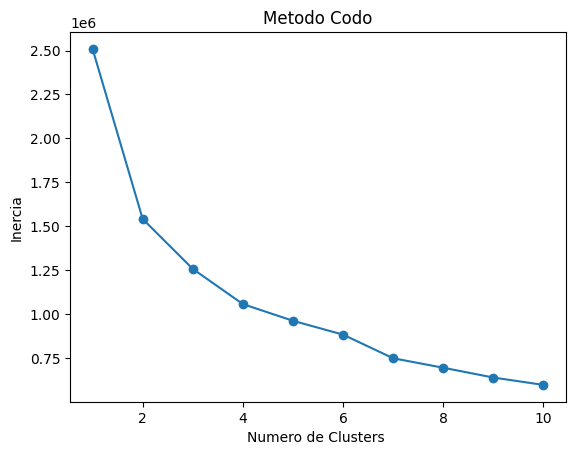

In [55]:
#valores numericos de dset para el metodo del codo
numericos_dset = dset.select_dtypes(include=['float64', 'int64'])

#Normalizacion
normalizado_dset = (numericos_dset - numericos_dset.mean()) / numericos_dset.std()


inertia = []
for k in range(1, 11):  
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalizado_dset)
    inertia.append(kmeans.inertia_)

# Grafica de clusters, metodo de codo
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Numero de Clusters ')
plt.ylabel('Inercia')
plt.title('Metodo Codo')
plt.show()

La grafica muestra la posicion de 10 clusters, por observación (ya sabemos q no es tu forma favorita alejo) reconcemos que se pueden utilizar cuatro clusters.

In [56]:
numericos_dset.head()

,YearStart,YearEnd,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,LocationID,Z_Score_Data_Value,Data_Value_Capped,LocationDesc_encoded
0,2015,2015,14.3,14.3,13.5,15.2,9001,-1.026349,14.3,37
1,2016,2016,6.1,6.1,5.3,7.1,9001,-1.419761,6.1,37
2,2020,2020,8.5,8.5,7.3,9.8,9004,-1.304616,8.5,55
3,2015,2015,26.4,26.4,25.0,27.9,9004,-0.445828,26.4,55
4,2018,2018,12.4,12.4,9.7,15.7,9001,-1.117506,12.4,37


El numero de clusters considerado es : 4

Se crea una columna para el dataset q contiene el valor de cada fila en el kmeans (al cluster al que pertenece)

In [80]:
kmeans = KMeans(n_clusters=4)

kmeans.fit(numericos_dset[['Data_Value', 'Low_Confidence_Limit','Data_Value']])
numericos_dset['kmeans_4']= kmeans.labels_



In [75]:
if len(kmeans.labels_) == len(numericos_dset):
    
    numericos_dset['kmeans'] = kmeans.labels_


In [81]:
numericos_dset

,YearStart,YearEnd,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,LocationID,Z_Score_Data_Value,Data_Value_Capped,LocationDesc_encoded,kmeans_4
0,2015,2015,14.3,14.3,13.5,15.2,9001,-1.026349,14.30,37,2
1,2016,2016,6.1,6.1,5.3,7.1,9001,-1.419761,6.10,37,2
2,2020,2020,8.5,8.5,7.3,9.8,9004,-1.304616,8.50,55,2
3,2015,2015,26.4,26.4,25.0,27.9,9004,-0.445828,26.40,55,0
4,2018,2018,12.4,12.4,9.7,15.7,9001,-1.117506,12.40,37,2
...,...,...,...,...,...,...,...,...,...,...,...
250932,2016,2016,62.9,62.9,26.5,38.3,40,1.305334,62.90,39,3
250933,2018,2018,11.1,11.1,26.5,38.3,48,-1.179876,11.10,48,2
250934,2018,2018,78.1,78.1,26.5,38.3,31,2.034584,68.15,29,3
250935,2018,2018,6.5,6.5,26.5,38.3,50,-1.400570,6.50,51,2


Se realiza un analisis descriptivo de cada fila utilizando la funcion describe()

In [82]:
grupos = numericos_dset.groupby('kmeans_4')


analisis_estadistico = grupos.describe()

print(analisis_estadistico)

         YearStart                                                         \
             count         mean       std     min     25%     50%     75%   
kmeans_4                                                                    
0         138482.0  2017.922755  2.040237  2015.0  2016.0  2018.0  2020.0   
1          22994.0  2018.296991  2.044825  2015.0  2016.0  2018.0  2020.0   
2          58740.0  2017.917909  2.039741  2015.0  2016.0  2018.0  2020.0   
3          30721.0  2017.800397  1.935769  2015.0  2016.0  2018.0  2019.0   

                   YearEnd               ... Data_Value_Capped         \
             max     count         mean  ...               75%    max   
kmeans_4                                 ...                            
0         2021.0  138482.0  2018.200481  ...             32.30  52.20   
1         2021.0   22994.0  2018.442246  ...             68.15  68.15   
2         2021.0   58740.0  2018.131307  ...             16.30  27.20   
3         2021.0   307

para el analisis, le pedimos a python crear un libro de excel con el analisis estadistico y exportarlo, para revisarlo y describir los clusters

In [91]:

from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows

wb = Workbook()

ws = wb.active
ws.title = "Sheet1"

for row in dataframe_to_rows(analisis_estadistico, index=False, header=True):
    ws.append(row)

excel_file_path = 'output1.xlsx'

wb.save(excel_file_path)